<a href="https://colab.research.google.com/github/myforkedrepositories/WOSplus/blob/master/test_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WOSplus tests:
If run from your environment, install wosplus with
```
# pip install wosplus
```

In [0]:
import os

In [0]:
FROM_REPO=True
if not FROM_REPO and os.getcwd()=='/content':
    !pip install wosplus > /dev/null
    os.mkdir('tmp')
    os.chdir('tmp')

In [0]:
# Check if colaboratory was launched and install missing requirements
if os.getcwd()=='/content':
    ! pip install openpyxl xlrd unidecode python-levenshtein requests_testadapter venn > /dev/null
    ! git clone https://github.com/colav/WOSplus.git > /dev/null
    os.chdir('WOSplus')

Cloning into 'WOSplus'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 584 (delta 27), reused 42 (delta 12), pack-reused 520
Receiving objects: 100% (584/584), 314.88 KiB | 11.66 MiB/s, done.
Resolving deltas: 100% (353/353), done.


In [0]:
import wosplus
from venn import draw_venn, generate_colors
import numpy as np

In [0]:
%%writefile drive.cfg
[FILES]
Sample_WOS.xlsx = 1--LJZ4mYyQcaJ93xBdbnYj-ZzdjO2Wq2
Sample_SCI.xlsx = 1-3a-hguQTk5ko8JRLCx--EKaslxGVscf
Sample_SCP.xlsx = 1-IAWlMdp2U-9L2jvZUio04ub1Ym3PX-H

Writing drive.cfg


In [0]:
cib=wosplus.wosplus('drive.cfg')

cib.load_biblio('Sample_WOS.xlsx')
cib.load_biblio('Sample_SCI.xlsx',prefix='SCI')
cib.load_biblio('Sample_SCP.xlsx',prefix='SCP')

print('before merge: {}'.format( cib.WOS.shape[0]+cib.SCI.shape[0]+cib.SCP.shape[0] )  )

before merge: 48


Step by step

In [0]:
cib.merge(left="WOS", right="SCI", left_DOI="DI", left_TI="TI", 
          left_extra_journal="SO", left_author="AU", left_year="PY",
          right_DOI="SCI_DI", right_TI="SCI_TI", right_extra_journal="SCI_SO", 
          right_author="SCI_AU", right_year="SCI_PY")

if True:
    print('intial: {}'.format( cib.WOS.shape[0]+cib.SCI.shape[0]) )
    print('final : {}'.format(  cib.WOS_SCI.shape) )

cib.merge(left="WOS_SCI", right="SCP", left_DOI="DI", left_TI="TI", 
               left_extra_journal="SO", left_author="AU", left_year="PY",
               right_DOI="SCP_DOI", right_TI="SCP_Title", 
               right_extra_journal="SCP_Source title", right_author="SCP_Authors",
               right_year="SCP_Year")

if True:
    print('intial: {}'.format( cib.WOS_SCI.shape[0]+cib.SCP.shape[0]) )
    print('final : {}'.format(  cib.WOS_SCI_SCP.shape) )

.intial: 38
final : (28, 96)
.intial: 38
final : (30, 139)


Single step

In [0]:
cib.mergeall()

....

before merge: 48
.intial: 38
final : (28, 96)
..intial: 38
final : (30, 142)

{'001': 27, '010': 11, '011': 28, '100': 10, '101': 29, '110': 15, '111': 30}


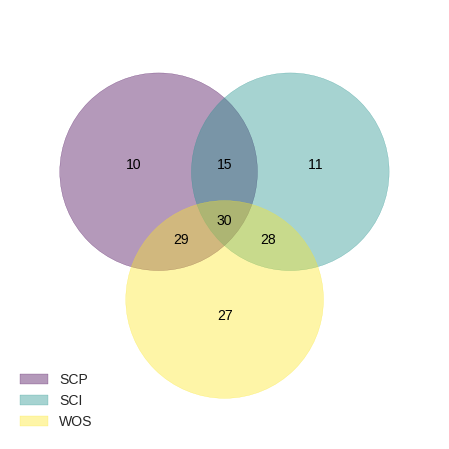

In [0]:
labels=["SCP","SCI","WOS"]

petal_labels={}
petal_labels["001"] = cib.WOS.shape[0]
petal_labels["010"] = cib.SCI.shape[0]
petal_labels["011"] = cib.WOS_SCI.shape[0]
petal_labels["100"] = cib.SCP.shape[0]
petal_labels["101"] = cib.WOS_SCP.shape[0]
petal_labels["110"] = cib.SCI_SCP.shape[0]
petal_labels["111"] = cib.WOS_SCI_SCP.shape[0]
print(petal_labels)
draw_venn(
    petal_labels=petal_labels, dataset_labels=labels,
    hint_hidden=False, colors=generate_colors(n_colors=3),
    figsize=(8, 8), fontsize=14, legend_loc="best", ax=None
)


<Figure size 288x288 with 0 Axes>

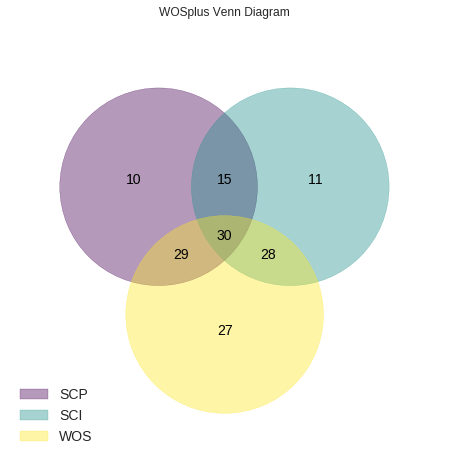

In [0]:
cib.plot_sets()

## Unitary tests
Copy to test.py:
```bash
cd tests
python test.py
```

In [0]:
import unittest
self = unittest.TestCase('__init__')
self.assertTrue(True)

self.assertTrue( cib.WOS.shape[0]+cib.SCI.shape[0]+cib.SCP.shape[0] == 48 )
                  
self.assertTrue ( cib.WOS.shape[0]+cib.SCI.shape[0] == 38  )
self.assertTrue (  cib.WOS_SCI.shape[0] == 28 ) 
        
         
self.assertTrue( cib.WOS_SCI.shape[0]+cib.SCP.shape[0] == 38  )
self.assertTrue( cib.WOS_SCI_SCP.shape[0] == 30  )

self.assertTrue(list( cib.WOS_SCI_SCP.Tipo.values )==['WOS','WOS',
           'WOS','WOS','WOS','WOS','WOS_SCI','SCI','WOS','WOS','WOS','WOS',
           'WOS','WOS','WOS','WOS','WOS','WOS_SCI','WOS_SCI','WOS_SCI',
           'WOS_SCP','WOS_SCI_SCP','WOS_SCI_SCP','WOS_SCI_SCP','WOS_SCP',
           'WOS_SCI_SCP','WOS_SCI_SCP','WOS_SCI_SCP','SCP','SCP'])

In [0]:
if os.getcwd()=='/content/WOSplus':
    ! cd tests && python3 test.py

..
----------------------------------------------------------------------
Ran 2 tests in 10.412s

OK
........

### In progress... Other database

In [0]:
cib.load_biblio('Sample_SCP.xlsx',prefix='NEW')

In [0]:
cib.merge(left='WOS_SCI_SCP',right='NEW',right_DOI='NEW_DOI',
            right_TI='NEW_Title',
            right_extra_journal='NEW_Source title',
            right_author='NEW_Authors',
            right_year='NEW_Year')

In [0]:
cib.WOS_SCI_SCP_NEW.shape

In [0]:
for logic in generate_logics(3):
    print(logic)